# Police Shootings in America - 2015 to 2022

With the advent of smartphones and internet technology we as a society have become more aware of the issues that affect us all. One of those issues that has come to the forefront of public opinion is how the impact of police actions affect various communities. A couple decades ago issues such as police brutality and unjustifiable homicides were hidden from a large portion of the population. If a case made it into court involving a police officer murdering a civillian the officer was at a huge advantage as their word is held higher than that of a civillian.

Now most people have the ability to video record police encouters and all sorts of abuses of power are being exposed to all segments of society and the people have gained some power to hold law enforcment accountable for their actions. 

For this sensitive a subject it is important to begin this process with an objective frame of mind. I will not be looking to prove, disprove, excuse or justify any actions by citizes or law enforcement. I will simply explore the data and see what insights I can discover based on that data. Regardless of circumstances a death is a tragic and will always hurt those around the deceased. Investigating the data is one of the tools available to work towards a better functioning society.

This dataset comes from the *Washington Post* which has been tracking police shootings since 2015. It records circumstances such as the manner of death, whether the suspect was armed, the presence of mental illness, age, sex, ethnicity and others. The dataset is available on [Kaggle](https://www.kaggle.com/datasets/ramjasmaurya/us-police-shootings-from-20152022) as well as a more detailed integrated dataset from [Mapping Police Violence](https://mappingpoliceviolence.org/).

In this notebook will explore how things like race, mental illness, location, sex, and situational circumstances are involved in fatal encounters with police. I will be using the standard python data science libraries such as `pandas` and `numpy` to manipulate the data as well as visualization libraries such as `matplotlib`, `seaborn`, and `plotly` to explore the data visually.

One last thing; while data exploration is a powerful tool in the search for truth it is impossible to be completely free of any bias. The data collection process could be subject to bias as well as the conclusion a person comes to. Most important to remember in this sensitive subject is that **correlation does not equal causation**.

## Downloading the Dataset

First thing to do is aquire the data. As I said above I will be using data from the Washington Post that has been uploaded to Kaggle [here](https://www.kaggle.com/datasets/ramjasmaurya/us-police-shootings-from-20152022). While is is possible to download from Kaggle without using any external libraries `opendatasets` makes the process a whole lot simpler and so I now swear by it. Once it is downloaded it is just a quick call to pandas `read_csv()` function to load the data into a dataframe that will be used throughout this notebook.

In [ ]:
!pip install jovian opendatasets 

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/ramjasmaurya/us-police-shootings-from-20152022' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: paulinski19871987
Your Kaggle Key: ··········


100%|██████████| 243k/243k [00:00<00:00, 67.7MB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './us-police-shootings-from-20152022'

In [ ]:
import os
os.listdir(data_dir)

['US Police shootings in from 2015-22.csv']

## Data Preparation and Cleaning

Before doing any in depth exploration I will need to check out the basic structure of the dataset. First I will check the number of rows and columns as well as each features data type. Next I will remove a couple features that are not needed for this analysis. Afterwards I will locate and handle any missing or invalid values and then convert some of the columns into boolean variables to simplify while retaining the important information.



Load the downloaded csv file into a **Pandas Dataframe** and take a quick peek using `DataFrame.head()`.

In [ ]:
import pandas as pd
import numpy as np

deaths_df = pd.read_csv(data_dir + '/US Police shootings in from 2015-22.csv')
deaths_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Here is a list of the feature names included

In [ ]:
deaths_df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

The number of rows and columns

In [ ]:
print(f"rows: {deaths_df.shape[0]}\tcolumns: {deaths_df.shape[1]}")

rows: 7729	columns: 17


There is some redundancy in this dataset, at least for my purposes here. I will remove the latitude, logitude and is_geocoding_exact columns as the city and state features provide enough location information. I will also drop the id and name columns as I am interested in overall patterns and not specific instances. 

Later on I may drop more columns such as the date, fleeing status and body camera. I may also get rid of either the city or the state column if both are not neccessary. Some analysis is needed before deciding on the utility of those features.

In [ ]:
deaths_df.drop(['id', 'name', 'longitude', 'latitude', 'is_geocoding_exact'], axis=1, inplace=True)
deaths_df.head(1)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False


Check datatypes and not-null values

In [ ]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     7729 non-null   object 
 1   manner_of_death          7729 non-null   object 
 2   armed                    7520 non-null   object 
 3   age                      7247 non-null   float64
 4   gender                   7709 non-null   object 
 5   race                     6269 non-null   object 
 6   city                     7729 non-null   object 
 7   state                    7729 non-null   object 
 8   signs_of_mental_illness  7729 non-null   bool   
 9   threat_level             7729 non-null   object 
 10  flee                     6854 non-null   object 
 11  body_camera              7729 non-null   bool   
dtypes: bool(2), float64(1), object(9)
memory usage: 619.0+ KB


This dataset is reasonably large so rather than having to individually examine each columns invalid values and come up with multiple solutions to fix it I am just going to get rid of all rows with incomplete information.

In [ ]:
deaths_df.dropna(inplace=True)

Now to check that it worked

In [ ]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 0 to 7726
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     5465 non-null   object 
 1   manner_of_death          5465 non-null   object 
 2   armed                    5465 non-null   object 
 3   age                      5465 non-null   float64
 4   gender                   5465 non-null   object 
 5   race                     5465 non-null   object 
 6   city                     5465 non-null   object 
 7   state                    5465 non-null   object 
 8   signs_of_mental_illness  5465 non-null   bool   
 9   threat_level             5465 non-null   object 
 10  flee                     5465 non-null   object 
 11  body_camera              5465 non-null   bool   
dtypes: bool(2), float64(1), object(9)
memory usage: 480.3+ KB


Excellent, now there are only valid entries to work with.

Next I will examine the **armed** column and see what there is to work with. 

In [ ]:
deaths_df['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'BB gun',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'crossbow', 'unknown weapon',
       'binoculars', 'pellet gun', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'pair of scissors', 'pole', 'pick-axe',
       'flashlight', 'spear', 'chair', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake', 'baton', 'crowbar',

There are allot of different values pertaining to weapons, too many for this exercise. The absence or presence of a weapon is more important than the exact type of weapon as the police would respond the same to a suspect with a pipe or a pole. Here I will convert "unarmed" and "undetermined" to 'no' and everything else to 'yes'. 

Convert **armed** values by applying a function to the column via the `Series.apply()` method from Pandas.

In [ ]:
def convert_armed(status):
  if status == 'unarmed' or status == 'undetermined':
    return 'no'
  else: return 'yes'

In [ ]:
deaths_df['armed'] = deaths_df['armed'].apply(convert_armed)

In [ ]:
deaths_df['armed'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 0 to 7726
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     5465 non-null   object 
 1   manner_of_death          5465 non-null   object 
 2   armed                    5465 non-null   object 
 3   age                      5465 non-null   float64
 4   gender                   5465 non-null   object 
 5   race                     5465 non-null   object 
 6   city                     5465 non-null   object 
 7   state                    5465 non-null   object 
 8   signs_of_mental_illness  5465 non-null   bool   
 9   threat_level             5465 non-null   object 
 10  flee                     5465 non-null   object 
 11  body_camera              5465 non-null   bool   
dtypes: bool(2), float64(1), object(9)
memory usage: 480.3+ KB


Lets see what unique values are in the **manner_of_death** column to determine their usefulness

In [ ]:
deaths_df['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

As this is a police shooting dataset and the only values for manner of death are "shot" and "shot and tasered" I think this column can be removed entirely

In [ ]:
deaths_df.drop('manner_of_death', axis=1, inplace=True)

Now to check the **threat_level** column

In [ ]:
deaths_df['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

I think this would be more useful as a simple yes/no value for whether the victim was attacking the police or not. I will follow a similar process to what was previously done for the armed column and then rename the column to "violent".

In [ ]:
def threat(status):
  if status == 'attack': return 'yes'
  return 'no'

deaths_df['threat_level'] = deaths_df['threat_level'].apply(threat)
deaths_df['threat_level'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
deaths_df.rename(columns={'threat_level': 'violent'}, inplace=True)

In [ ]:
deaths_df.columns

Index(['date', 'armed', 'age', 'gender', 'race', 'city', 'state',
       'signs_of_mental_illness', 'violent', 'flee', 'body_camera'],
      dtype='object')

Lets simplify the **flee** feature. It has multiple values that indicate the deceasaed was trying to run away from the cops. Personally I see this as a natural response to the threat of loss of freedom but despite that it escalates the situation and police response to the person.

Anyways here are the values present in the **flee** column:

In [ ]:
deaths_df['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

Alright, I may find later than I need the detailed values but as it stands I think that **flee** can simply be changed into a yes or no value and then renamed to **fleeing** to avoid confusion.

In [ ]:
def flee(status):
  if status == 'Not fleeing': return 'no'
  return 'yes'

deaths_df['flee'] = deaths_df['flee'].apply(flee)
deaths_df.rename(columns={'flee': 'fleeing'}, inplace=True)
deaths_df['fleeing'].unique()

array(['no', 'yes'], dtype=object)

Here I will change the mental illenss value to a yes/no instead of True/False. This will be helpful later on for visualizations.

In [ ]:
def mentally_ill(status):
  if status == True: return 'yes'
  return 'no'

deaths_df['signs_of_mental_illness'] = deaths_df['signs_of_mental_illness'].apply(mentally_ill)

Perhaps the date column datatype should we switched from an object to datetime.

In [ ]:
deaths_df['date'] = pd.to_datetime(deaths_df['date'])

In [ ]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 0 to 7726
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     5465 non-null   datetime64[ns]
 1   armed                    5465 non-null   object        
 2   age                      5465 non-null   float64       
 3   gender                   5465 non-null   object        
 4   race                     5465 non-null   object        
 5   city                     5465 non-null   object        
 6   state                    5465 non-null   object        
 7   signs_of_mental_illness  5465 non-null   object        
 8   violent                  5465 non-null   object        
 9   fleeing                  5465 non-null   object        
 10  body_camera              5465 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(8)
memory usage: 475.0+ KB


## Exploratory Analysis and Visualization

Here we will explore the distributions of:
- Race/Ethnicity
- Location/State of the deaths
- Age of the victims
- Violent behaviour
- Mental illness



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Most of the data is now categorical/boolean so age is the only numeric feature. Lets check out the statistical distributions of the age values.

In [ ]:
deaths_df.describe()

,age
count,5465.000000
mean,36.729369
std,12.651272
min,6.000000
25%,27.000000
50%,35.000000
75%,45.000000
max,91.000000


Right away there are a couple interesting insights to be found here. The youngest age  is 6 years old and the oldest is 91. Let's look into that.

In [ ]:
small_child = deaths_df[deaths_df['age'] < 10]
small_child

,date,armed,age,gender,race,city,state,signs_of_mental_illness,violent,fleeing,body_camera
833,2015-11-03,no,6.0,M,W,Marksville,LA,no,no,yes,True
2899,2017-12-21,no,6.0,M,W,Schertz,TX,no,no,no,False


This is a good example of where data doesn't tell the whole story. As shown above there were 2 examples of 6 year old children dying from a police officer. Neither were armed, mentally ill, violent or fleeing. Initially I saw this an was mortified, wondering how on earth could anyone justify shooting a dosile child.

Later on I looked up these cases in order to find out more detail. In both cases the children were not the targets. One was hit by a stray bullet, the other was in a vehicle with someone who was being pursued by the police and got hit when they were taking down the driver. 

While still tragic these were not delliberate murders by the state, they were collateral damage. I was just going to change my insights after learning this but then I thought this was the perfect example of a case where the data does not show one of the most important aspects to the situation. This is why we must be careful with our interpretation of the data.

In [ ]:
elderly_victim = deaths_df[deaths_df['age'] == 91]
elderly_victim

,date,armed,age,gender,race,city,state,signs_of_mental_illness,violent,fleeing,body_camera
2157,2017-03-08,yes,91.0,M,W,Union Township,PA,no,yes,no,False
5967,2021-01-09,yes,91.0,F,W,Victorville,CA,no,yes,no,False


It looks like the 2 most elderly people to die from gunshots inflicted by law enforcement were violent and armed.

Before moving on I am going to create 2 subsets. One subset will contain all deaths of a minor (defined as under 18 years old) and the other will be for the elderly (defined as older than 69 years of age)

In [ ]:
youth_deaths = deaths_df[deaths_df['age'] < 18]
youth_deaths

,date,armed,age,gender,race,city,state,signs_of_mental_illness,violent,fleeing,body_camera
51,2015-01-22,yes,17.0,F,W,Longview,TX,yes,no,no,False
60,2015-01-26,yes,17.0,F,H,Denver,CO,no,no,no,False
77,2015-02-02,yes,17.0,M,W,Bay City,MI,no,yes,no,False
110,2015-02-14,yes,16.0,M,W,Essex,MD,yes,yes,yes,False
134,2015-02-23,yes,16.0,M,B,Millbrook,AL,no,yes,no,False
...,...,...,...,...,...,...,...,...,...,...,...
6246,2021-04-12,yes,17.0,M,B,Knoxville,TN,no,no,yes,True
6249,2021-04-13,yes,16.0,M,W,Leonardtown,MD,no,yes,no,False
6276,2021-04-20,yes,16.0,F,B,Columbus,OH,no,no,no,True
6795,2021-10-16,yes,17.0,M,W,Tarpon Springs,FL,no,yes,no,False


In [ ]:
elderly_deaths = deaths_df[deaths_df['age'] > 69]
elderly_deaths

,date,armed,age,gender,race,city,state,signs_of_mental_illness,violent,fleeing,body_camera
19,2015-01-09,yes,71.0,M,W,England,AR,no,yes,no,False
29,2015-01-14,yes,75.0,M,W,Old Bridge,NJ,no,yes,no,False
92,2015-02-07,yes,74.0,M,B,Gastonia,NC,no,yes,no,False
126,2015-02-20,yes,77.0,M,B,Birmingham,AL,yes,yes,no,False
275,2015-04-12,yes,83.0,M,W,Oklahoma City,OK,yes,no,no,False
...,...,...,...,...,...,...,...,...,...,...,...
5882,2020-12-10,yes,79.0,M,W,Dumfries,VA,yes,yes,yes,False
5967,2021-01-09,yes,91.0,F,W,Victorville,CA,no,yes,no,False
6162,2021-03-18,yes,79.0,M,W,Pasadena,MD,yes,yes,no,False
6168,2021-03-20,yes,79.0,M,W,Hudson,FL,yes,no,no,True


First of all let's look at the breakdown of cases by race and by gender using the `countplot()` method from Seaborn and the `pie()` method from Matplotlib. The countplot function sums up the occurances of each feature value in a dataframe column. The pie method will be explained below.

(A)sian	(W)hite	(H)ispanic	(B)lack	(O)ther	(N)ative American


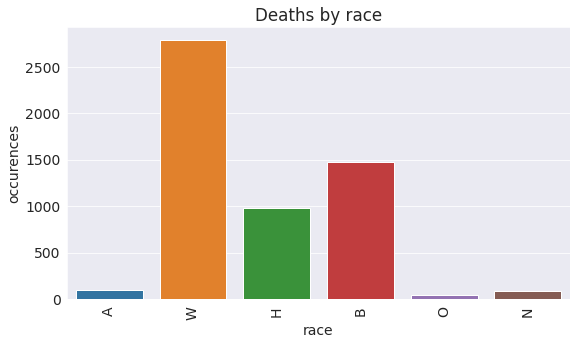

In [ ]:
print(f"(A)sian\t(W)hite\t(H)ispanic\t(B)lack\t(O)ther\t(N)ative American")
sns.countplot(x=deaths_df['race'])
plt.xticks(rotation=90)
plt.title('Deaths by race')
plt.ylabel('occurences')
plt.show()

Here we will use `matplotlib.pyplot.pie()` to create a pie chart. We cannot simply give it our dataframe as it requires a single number per value to calculate percentages. 

First we will get the number of male and female victims and put those numbers into an array. We will also create and array of the corresponding labels. Both will be given to the pie function along with some styling values.

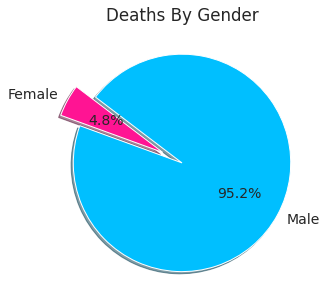

In [ ]:
male = deaths_df[deaths_df['gender'] == 'M'].shape[0]
female = deaths_df[deaths_df['gender'] == 'F'].shape[0]

y = np.array([male, female])
labels = ['Male', 'Female']

plt.pie(y, labels=labels, 
        explode=[0, 0.2], 
        colors=['deepskyblue', 'deeppink'], 
        shadow=True,
        startangle=160,
        autopct='%1.1f%%')
plt.title('Deaths By Gender')
plt.show()

In the first chart we can see white people make up the largest number of deaths, followed by black people and the hispanics. According to [the United States Cencus Bureau](https://www.census.gov/) caucasians make up 61% of the population, black/African Americans make up 12.4% and hispanics make up 18.5%. 

For the majority of the deaths the deceased person was male. This is not suprising as men exhibit patterns of criminality at a much higher rate than women do.

Next let's take a look at the case breakdown by the age of the deceased. We will use the matplotlib `pyplot.hist()` method to draw a histogram. We will input the age column into it and create bins for roughly 2 year increments.

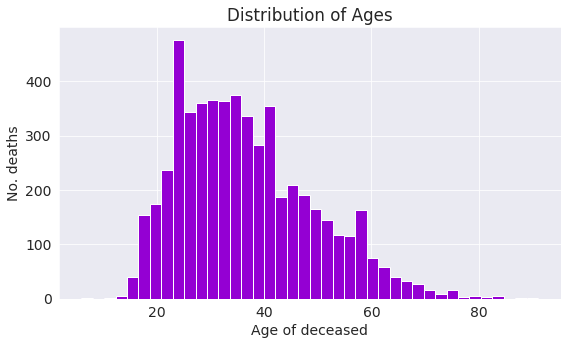

In [ ]:
plt.hist(deaths_df['age'], bins=40, color='darkviolet')
plt.title('Distribution of Ages')
plt.xlabel('Age of deceased')
plt.ylabel('No. deaths')
plt.show()

As you can see above the highest number of cases involves persons in their mid twenties, and stays high until around the age of 40, after which the number of cases continually decreases with age. This matches the patterns of criminality based on age found in social science based research.

Here we will explore how often the deceased was armed using the seaborn library version of a histogram. `sns.histplot` is used pretty much the same as the matplotlib version although I find the styling to be more appealing.

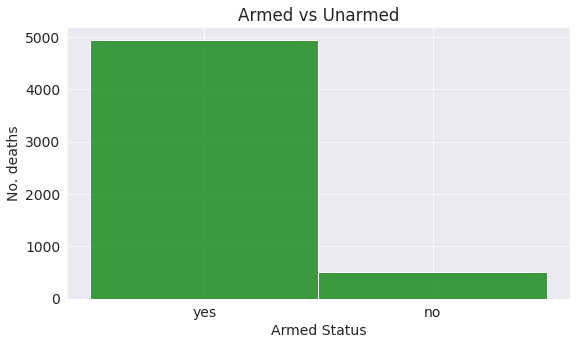

In [ ]:
sns.histplot(deaths_df['armed'], color='green')
plt.title('Armed vs Unarmed')
plt.ylabel('No. deaths')
plt.xlabel('Armed Status')
plt.show()

Looks like the majority of victims were in possession of some variety of weapon before they were killed.

Now lets look at how often the deceased was found to be violent before getting shot. We will use seaborn's `countplot()` to visualize this which also takes a column from the dataframe and show the number off occurances for each value. Just for some variety we will give the data to the y axis instead of the x axis so the bars are drawn horizontally.

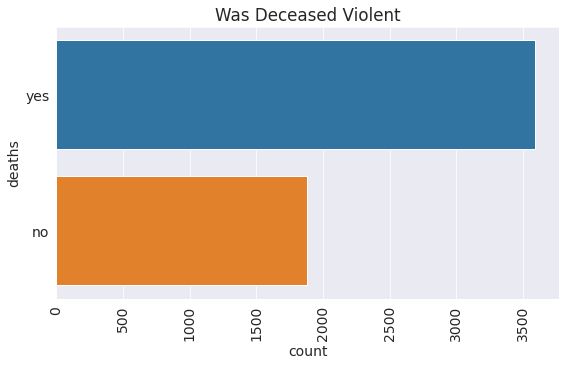

In [ ]:
sns.countplot(y=deaths_df['violent'])
plt.xticks(rotation=90)
plt.title('Was Deceased Violent')
plt.ylabel('deaths')
plt.show()


# sns.histplot(deaths_df['violent'], color='crimson')
# plt.title('Was Deceased Violent')
# plt.ylabel('No. deaths')
# plt.xlabel('Was violent')
# plt.show()

Looks like almost half of the victims were not behaving aggressively leading up to their death.

I will now craete 2 subsets of data based on multiple conditions in order to find out how often the deceased was armed and violent against how many were unarmed and not aggressive.

In [ ]:
armed_and_violent = deaths_df[(deaths_df['armed'] == 'yes') & (deaths_df['violent'] == 'yes')]
unarmed_and_nonviolent = deaths_df[(deaths_df['armed'] == 'no') & (deaths_df['violent'] == 'no')]

3409 342


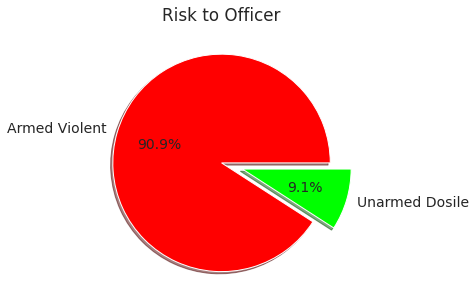

In [ ]:
armViolent = armed_and_violent.shape[0]
notArmViolent = unarmed_and_nonviolent.shape[0]
print(armViolent, notArmViolent)

y = np.array([armViolent, notArmViolent])
labels = ['Armed Violent', 'Unarmed Dosile']

plt.pie(y, labels=labels, 
        explode=[0, 0.2], 
        colors=['red', 'lime'], 
        shadow=True,
        autopct='%1.1f%%')
plt.title('Risk to Officer')
plt.show()

As illustrated the majority of persons fatally shot by the police were in possesion of some sort of weapon during their confrentation of the police. 

Interestingly only around half of the suspects were behaving in an aggressive or violent manner. 

In the last pie chart I created one group where the suspect was both armed and violent towards officers preceding their death and another where the suspect was neither in possesion of a weapon or behaving aggressively. We can see that only approximately 1/8th of the deceased presented no physical threat to the officers.

Mentall illness often plays a role in criminality, although this does not necessarily mean that it leads to violence. Lets see what proportion of the deceased had apparent mental health issues.

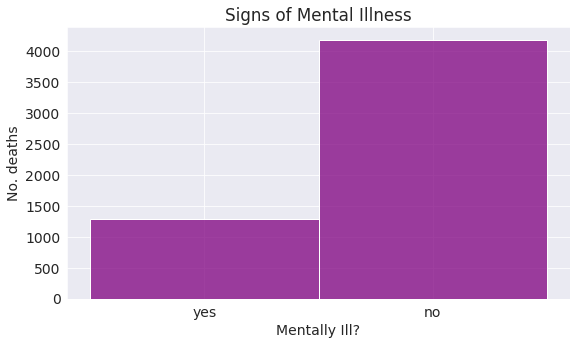

In [ ]:
sns.histplot(deaths_df['signs_of_mental_illness'], color='purple')
plt.title('Signs of Mental Illness')
plt.ylabel('No. deaths')
plt.xlabel('Mentally Ill?')
plt.show()

Let's take a look at how the number of deaths has been increasing since 2015.

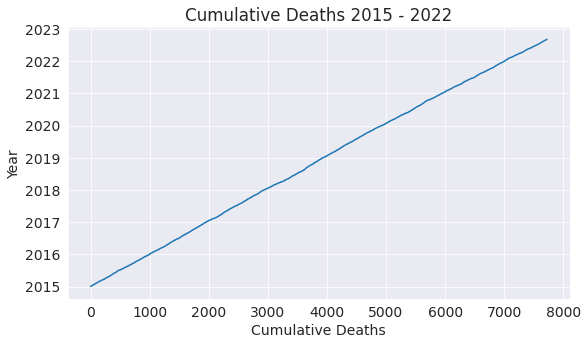

In [ ]:
plt.plot(deaths_df['date'])
plt.xlabel('Cumulative Deaths')
plt.ylabel('Year')
plt.title('Cumulative Deaths 2015 - 2022')
plt.show()

Looks like deaths have been increasing linearily.

## Asking and Answering Questions

In this section we will explore whether African Americans are more likely to be killed by police when non violent and unarmed than the general population. We will look at which states have the most occurances of police homicide. We will then look at some factors at play when persons under the age of 18 have been killed.



#### Q1: Is an unarmed and non-violent black american significantly more likely to recieve a fatal gunshot wound from law enforcement?

Many have speculated that police are more likely to kill a black person during an encounter than compared to the general population. Below I will further refine my **armed and violent** and **not armed or violent** datasets from above in order to visualize the proportion of low risk to high risk fatal encounters and compare with the general populations ratio.

First I will create 2 subsets with only African American victims and then use those with `matplotlib.pyplot.pie()` to create a nice pie chart. Note the parameters for the formatting and shadow effect. For a more detailed explanation of pie charts see the exploration section of this notebook.

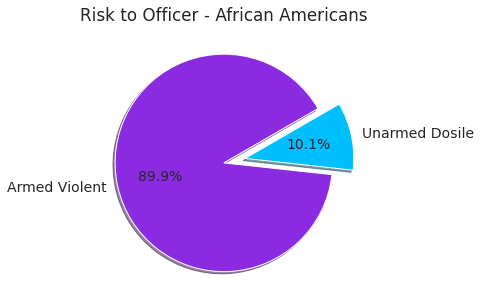

In [ ]:
african_armViolent = armed_and_violent[armed_and_violent['race'] == 'B'].shape[0]
african_notArmViolent = unarmed_and_nonviolent[unarmed_and_nonviolent['race'] == 'B'].shape[0]

y = np.array([african_armViolent, african_notArmViolent])
labels = ['Armed Violent', 'Unarmed Dosile']

plt.pie(y, labels=labels, 
        explode=[0, 0.2], 
        colors=['blueviolet', 'deepskyblue'], 
        shadow=True,
        autopct='%1.1f%%',
        startangle=30)
plt.title('Risk to Officer - African Americans')
plt.show()

As shown above there was a 1% difference between the African American Violent/Armed to Unarmed/Dosile vicitm ratio. It would not appear that unarmed and non-violent black men or women are more likely to be fatally shot by the police.

#### Q2: Which states have the highest number of deaths?

In this section we will call on our old friend the `seaborn.countplot()` to see the number of occurances per state side by side for comparison.



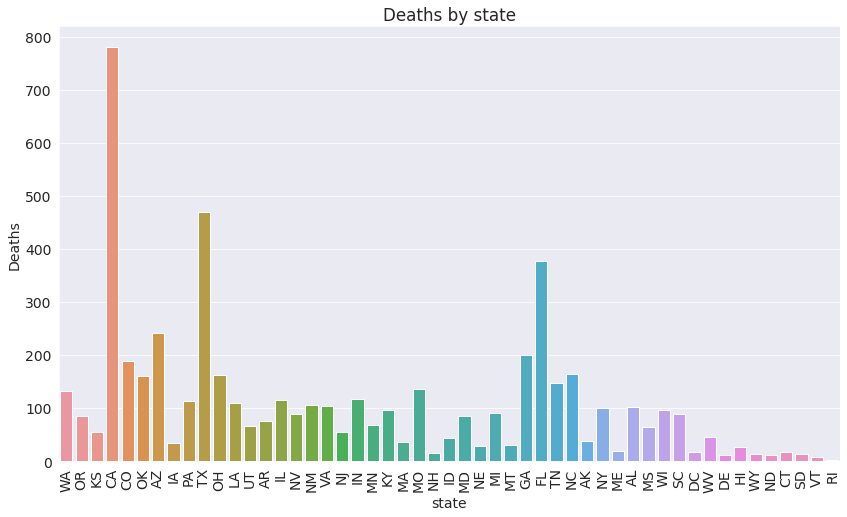

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x=deaths_df['state'])
plt.xticks(rotation=90)
plt.title('Deaths by state')
plt.ylabel('Deaths')
plt.show()

By far the highest number of fatalities happened in California. This is not suprising given the almost legendary reputation CA has for excessive crime. Texas also has a much higher number of deaths than most of the coutry followed closely by Florida.

#### Q3: Are the youth deaths justified by violence?

As before we will create an unarmed and non violent category with an armed and violent category to see the circumstances in youth deaths by law enforcement.

Again we will put these numebrs into an array and plot with the matplotlib `pie()` method, but since that is getting a little stale we will turn it into a donut chart. 

To make the donut chart we:
- Create pie chart as before
- Create the center circle using `pyplot.Circle()` with an (x,y) tuple, radius and white color value.
- Save the current figure to a variable using the `pyplot.gcf()` (get current figure) method.
- Add the circle to the pie chart using the `pyplot.gca.add_artist()` method (gca for get current axis).

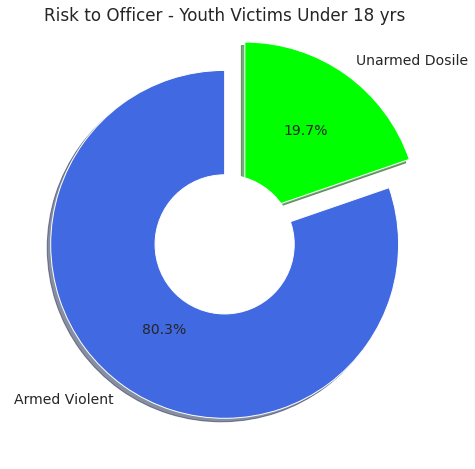

In [ ]:
youth_armViolent = armed_and_violent[armed_and_violent['age'] < 18].shape[0]
youth_notArmViolent = unarmed_and_nonviolent[unarmed_and_nonviolent['age'] < 18].shape[0]

y = np.array([youth_armViolent, youth_notArmViolent])
labels = ['Armed Violent', 'Unarmed Dosile']

plt.figure(figsize=(8, 8))
plt.pie(y,
        labels=labels, 
        explode=[0, 0.2], 
        colors=['royalblue', 'lime'], 
        shadow=True,
        autopct='%1.1f%%',
        startangle=90
         )

# draw circle
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Risk to Officer - Youth Victims Under 18 yrs')
plt.show()

I did not expect to see that... It looks like youth are twice as likely to be killed in a police encounter even when unarmed and dosile. I had expected it to go the other way.

#### Q4: What is the prevelance of mental illness in the youth deaths?

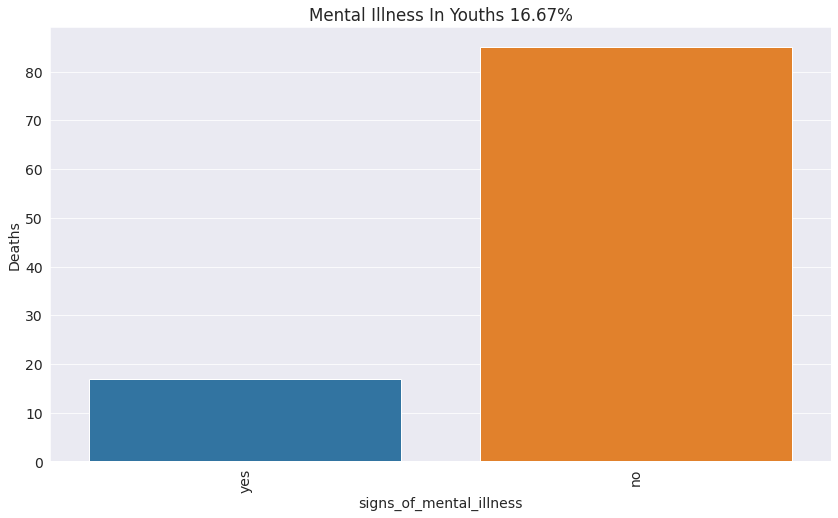

In [ ]:
ill = len(youth_deaths[youth_deaths['signs_of_mental_illness'] == 'yes']) / len(youth_deaths) * 100

plt.figure(figsize=(14,8))
sns.countplot(x=youth_deaths['signs_of_mental_illness'])
plt.xticks(rotation=90)
plt.title(f'Mental Illness In Youths {ill:.2f}%')
plt.ylabel('Deaths')
plt.show()

#### Q5: Which states have the most occurances of youth being killed by the police.

Here we will do the same thing we did earlier to get the state comparison but this time for the youth dataset.

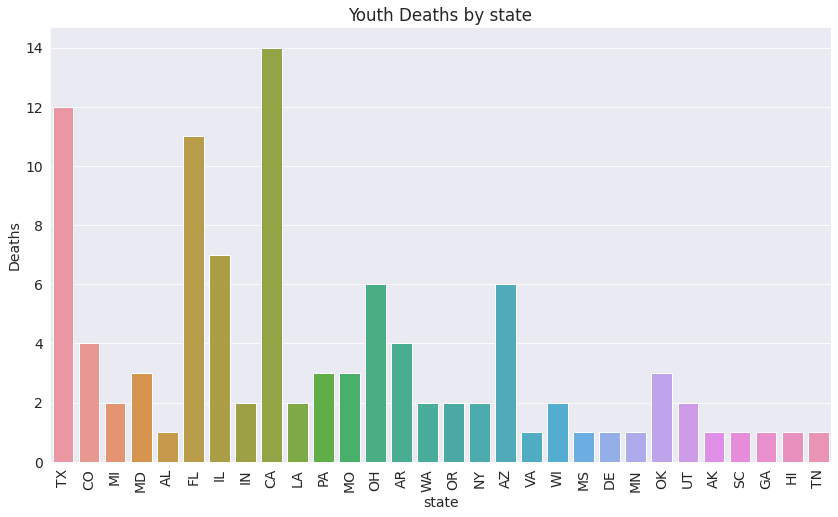

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x=youth_deaths['state'])
plt.xticks(rotation=90)
plt.title('Youth Deaths by state')
plt.ylabel('Deaths')
plt.show()

The state distribution looks very similar to that of the general population with California followed by Texas then Florida.

#### Q6: How often was the victim trying to flee the police when they were killed?

Let's use one more countplot to see if fleeing the cops is a contributing factor in these deaths.

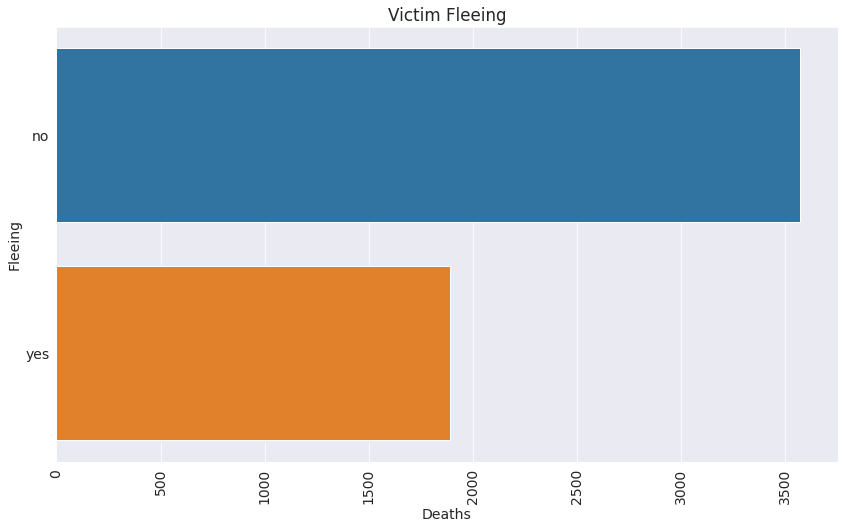

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(y=deaths_df['fleeing'])
plt.xticks(rotation=90)
plt.title('Victim Fleeing')
plt.xlabel('Deaths')
plt.ylabel('Fleeing')
plt.show()

It appears that around half of the time the deceased was attempting to evade law enforcment.

In [ ]:
deaths_df

,date,armed,age,gender,race,city,state,signs_of_mental_illness,violent,fleeing,body_camera
0,2015-01-02,yes,53.0,M,A,Shelton,WA,yes,yes,no,False
1,2015-01-02,yes,47.0,M,W,Aloha,OR,no,yes,no,False
2,2015-01-03,no,23.0,M,H,Wichita,KS,no,no,no,False
3,2015-01-04,yes,32.0,M,W,San Francisco,CA,yes,yes,no,False
4,2015-01-04,yes,39.0,M,H,Evans,CO,no,yes,no,False
...,...,...,...,...,...,...,...,...,...,...,...
7621,2022-07-30,yes,27.0,M,W,Rochester,MN,no,no,no,True
7662,2022-08-15,yes,32.0,M,B,Miami-Dade County,FL,no,yes,yes,False
7691,2022-08-27,yes,50.0,M,W,Charleston,WV,no,yes,no,False
7702,2022-08-30,no,20.0,M,B,Columbus,OH,no,no,no,True


Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

While this analysis only scratches the surface of a complex issue it did show some interesting results. 

I thought that mentall illness would be a more significant factor in these situations, I would have estimated 50% but the data shows that only about 1/6 of the time there was obvious mental illness affecting the deceased persons behaviour. 

Around 1 in 10 of the victims were what many would consider a non threat to the officers, by which I mean they were neither armed nor violent. There doesn't appear to be the singling out of dosile black people by law enforcment which is contrary to allot of the things we have been hearing from the media.

The states with the highest number of occurances are California, Texas and Florida. Population most likely accounts for some of the differences between states. Related to that, with a larger population there is inevidibly more crime, however politics and local policy probably also plays a role, California is know to have a major crime problem.

Sadly the percentage of unarmed and non violent youths gunned down by the police was double that of the general population. I also would have guessed the opposite before doing this analysis. 

Around 50% of the time the victim was trying to run away from the police which seems to make them react more extremely, despite being a natural human reaction (evading captivity).

## References and Future Work

There is so much more digging to be done on this subject. A team could use the original ID column to learn more about each of the deaths and possibly find more pertinant aspects to the situation. I don't have the time to do that but it seems like it would add some valuable context. 

It might be insightful to match the deaths by state to the portion of the American population in each state to see if the rates are based on the number of residents. 

The weapons could be broken down individually and assigned a threat level based on the danger posed by someone weilding each weapon.

You could pretty much dive deep into each feature to gain more contextual information. Generalizing to 'police are abusing power' or 'police are just doing their job' would be an abuse of such preliminary findings. You might reach completely different conclusions with more detailed and robust data. 

<hr />

I didn't use a whole lot of external resources for this project. There are 2 places where I learned about data analysis and they are:
- [Jovian](https://forum.jovian.ai), hands down the best resource I used. 
- [Free Code Camp](https://www.freecodecamp.org/), another excellent coding resource.

To find out the details for using various plotting libraries and dataframe operations I consulted the following documentations:
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)

For general quick guides on a variety of methods:
- [Geeks For Geeks](https://www.geeksforgeeks.org/), a great place to find all sorts of quick examples in many differernt programming languages. Often my first stop when learning something new.